/newpage

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn import neighbors
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, scale
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, TruncatedSVD, FactorAnalysis
from sklearn.model_selection import train_test_split

from scipy import stats

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
chronic_kidney_disease = fetch_ucirepo(id=336) 
  
# data (as pandas dataframes) 
X = chronic_kidney_disease.data.features 
y = chronic_kidney_disease.data.targets 

In [4]:
df = pd.concat([X, pd.DataFrame(y, columns=["class"])], axis=1)
kidney = df

(1)

We can do a Binary Classification to predict whether a patient has chronic kidney disease base on other performance

(2)

In [7]:
kidney["class"] = df["class"].str.strip()
kidney["class"] = df["class"].replace({"ckd": 1, "notckd": 0})

C:\Users\siyin\AppData\Local\Temp\ipykernel_13996\4048663165.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  kidney["class"] = df["class"].replace({"ckd": 1, "notckd": 0})


In [8]:
Tra = {
    'rbc': {'normal': 1.0, 'abnormal': 0},
    'pc': {'normal': 1.0, 'abnormal': 0},
    'pcc': {'present': 1.0, 'notpresent': 0},
    'ba': {'present': 1.0, 'notpresent': 0},
    'htn': {'yes': 1.0, 'no': 0},
    'dm': {'yes': 1.0, 'no': 0},
    'cad': {'yes': 1.0, 'no': 0},
    'appet': {'good': 1.0, 'poor': 0},
    'pe': {'yes': 1.0, 'no': 0},
    'ane': {'yes': 1.0, 'no': 0},

}

In [9]:
for column, Tra in Tra.items():
    kidney[column] = kidney[column].replace(Tra)

In [10]:
float_c = kidney.select_dtypes(include=['float64']).columns
object_c = kidney.select_dtypes(include=['object']).columns

In [11]:
scaler = StandardScaler()
kidney[float_c] = scaler.fit_transform(kidney[float_c])

(3)

In [12]:
kidney.shape

(400, 25)

In [13]:
kidney.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,cad,appet,pe,ane,class
count,3.910000e+02,3.880000e+02,3.530000e+02,354.000000,351.000000,2.480000e+02,335.000000,3.960000e+02,3.960000e+02,3.560000e+02,...,3.480000e+02,3.290000e+02,2.940000e+02,2.690000e+02,3.980000e+02,3.980000e+02,399.000000,3.990000e+02,3.990000e+02,400.000000
mean,9.994847e-17,-2.380684e-16,2.415443e-15,0.000000,0.000000,8.595275e-17,0.000000,-1.794300e-17,-5.382900e-17,-1.796316e-16,...,4.083579e-17,1.295823e-16,1.450087e-16,8.452553e-16,-7.141133e-17,8.926416e-17,0.000000,-7.123235e-17,3.561618e-17,0.625000
std,1.001281e+00,1.001291e+00,1.001419e+00,1.001415,1.001428,1.002022e+00,1.001496,1.001265e+00,1.001265e+00,1.001407e+00,...,1.001440e+00,1.001523e+00,1.001705e+00,1.001864e+00,1.001259e+00,1.001259e+00,1.001255,1.001255e+00,1.001255e+00,0.484729
min,-2.885708e+00,-1.936857e+00,-2.173584e+00,-0.752868,-0.410106,-2.067993e+00,-1.846048,-3.444475e-01,-2.425356e-01,-1.591967e+00,...,-3.241109e+00,-3.329218e+00,-2.111312e+00,-2.547777e+00,-7.652825e-01,-3.056249e-01,-1.966177,-4.850713e-01,-4.207032e-01,0.000000
25%,-5.530393e-01,-4.733701e-01,-1.297699e+00,-0.752868,-0.410106,4.835606e-01,0.541698,-3.444475e-01,-2.425356e-01,-6.193803e-01,...,-7.655198e-01,-7.669527e-01,-6.484596e-01,-7.889609e-01,-7.652825e-01,-3.056249e-01,0.508601,-4.850713e-01,-4.207032e-01,0.000000
50%,2.050779e-01,2.583733e-01,4.540705e-01,-0.752868,-0.410106,4.835606e-01,0.541698,-3.444475e-01,-2.425356e-01,-3.414983e-01,...,4.248496e-02,1.242700e-01,-1.381622e-01,9.044717e-02,-7.652825e-01,-3.056249e-01,0.508601,-4.850713e-01,-4.207032e-01,1.000000
75%,7.590867e-01,2.583733e-01,4.540705e-01,0.727772,-0.410106,4.835606e-01,0.541698,-3.444475e-01,-2.425356e-01,1.890038e-01,...,8.504897e-01,6.812843e-01,4.741947e-01,6.767192e-01,1.306707e+00,-3.056249e-01,0.508601,-4.850713e-01,-4.207032e-01,1.000000
max,2.246163e+00,7.575807e+00,1.329955e+00,2.948733,4.145186,4.835606e-01,0.541698,2.903200e+00,4.123106e+00,4.319341e+00,...,1.813219e+00,1.683910e+00,6.121486e+00,3.217231e+00,1.306707e+00,3.271984e+00,0.508601,2.061553e+00,2.376973e+00,1.000000


There are 25 variables and 400 observations.

There are 11 numerical variables and 14 nominal variables.

(4)

(5)

In [ ]:
kidney_cleaned = kidney.dropna()
kidney_new = kidney_cleaned[float_c]

In [ ]:
kidney_cleaned.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc               float64
pc                float64
pcc               float64
ba                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn               float64
dm                 object
cad                object
appet             float64
pe                float64
ane               float64
classification    float64
dtype: object

There are 25 variables and 400 observations.

There are 11 numerical variables and 14 nominal variables.

(6)

In [ ]:
z_score = np.abs(stats.zscore(kidney_new))
outliers = np.where(z_score > 3)

kidney_no_outliers = kidney_new[(z_score < 3).all(axis=1)]

(7)

In [ ]:
x = kidney_new.drop('classification', axis=1)
pca_x = PCA()
pca = pd.DataFrame(pca_x.fit(x).components_.T, index=x.columns)

In [ ]:
scores = pd.DataFrame(pca_x.fit_transform(x), index=x.index)
scores[0]

3      5.360329
9      4.506948
11     5.109409
14     6.478390
20     4.882842
         ...   
395   -1.283096
396   -1.910749
397   -1.562320
398   -1.553751
399   -1.591851
Name: 0, Length: 158, dtype: float64

In [ ]:
k_means = KMeans(n_clusters=2, n_init=20, random_state=0)
k_means.fit(x)

KMeans(n_clusters=2, n_init=20, random_state=0)

In [ ]:
pd.Series(k_means.labels_).value_counts()

0    121
1     37
Name: count, dtype: int64

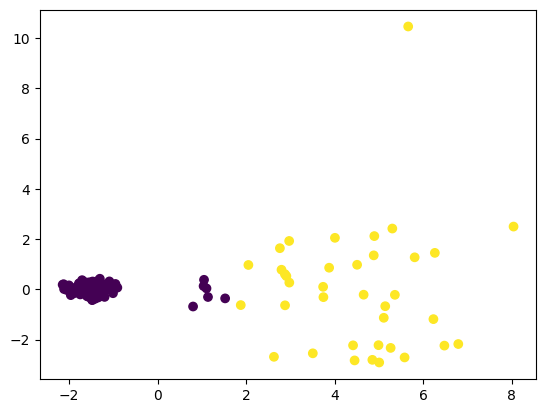

In [ ]:
plt.scatter(scores[0], scores[1], c=k_means.labels_)

(8)

In [ ]:
x_scaled = scale(x, axis=0)
y = kidney_new['classification']


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled,
    y,
    test_size=0.3,
    random_state=1,
    stratify=y
)


(9)

(10)

In [ ]:
k_5 = neighbors.KNeighborsClassifier(
    n_neighbors = 2,
    algorithm='brute'
    )

In [ ]:
k_5.fit(x_train, y_train)


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.